In [1]:
lead <-  read.csv('D:/3rd_Semester/6611_biostatisticalmethod/hw10/lead2.csv')

In [2]:
install.packages('MASS')
library(MASS)
bootc <- rlm(iq ~ miles, data=lead)
bootadj <- rlm(iq ~ miles + first2y, data=lead)
bootcv <- rlm(first2y ~ miles, data=lead)
summary(bootc)
summary(bootadj)


package 'MASS' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Swayanshu\AppData\Local\Temp\RtmpmSBBGq\downloaded_packages


Warning message:
"package 'MASS' was built under R version 3.6.3"


Call: rlm(formula = iq ~ miles, data = lead)
Residuals:
      Min        1Q    Median        3Q       Max 
-48.91276  -9.05927  -0.08186  10.20436  48.66051 

Coefficients:
            Value   Std. Error t value
(Intercept) 96.5671  3.2022    30.1564
miles        1.8020  1.6911     1.0656

Residual standard error: 13.76 on 122 degrees of freedom


Call: rlm(formula = iq ~ miles + first2y, data = lead)
Residuals:
      Min        1Q    Median        3Q       Max 
-48.58293  -9.06192   0.05112   9.67217  47.65619 

Coefficients:
            Value   Std. Error t value
(Intercept) 95.5922  3.9565    24.1609
miles        2.1494  1.8762     1.1456
first2y      1.2519  3.2811     0.3815

Residual standard error: 13.85 on 121 degrees of freedom

In [3]:
BootBM <- 1.2519
BootBMSTE <- 3.2811
summary(bootcv)
BootGM <- -0.2512
BootGMSTE <- 0.0480
bootprop <- ((1.8020-2.1494)/1.8020)
bootSE <- sqrt((BootGM^2)*(BootBMSTE^2)+(BootBM^2)*(BootGMSTE^2))
bootci1 <- ((1.8020-2.1494)+1.96*(bootSE))
bootci2 <- ((1.8020-2.1494)-1.96*(bootSE))
bootci1/1.8020
bootci2/1.8020


Call: rlm(formula = first2y ~ miles, data = lead)
Residuals:
    Min      1Q  Median      3Q     Max 
-0.5653 -0.3182 -0.1326  0.4662  0.8921 

Coefficients:
            Value   Std. Error t value
(Intercept)  0.7079  0.0908     7.7954
miles       -0.2512  0.0480    -5.2379

Residual standard error: 0.5117 on 122 degrees of freedom

[1] 0.7060732

[1] -1.091645

In [22]:
one.way <- aov(iq ~ first2y, data = lead)

summary(one.way)

             Df Sum Sq Mean Sq F value Pr(>F)
first2y       1     16   16.26   0.063  0.802
Residuals   122  31446  257.75               

In [23]:
two.way <- aov(iq ~ first2y + miles, data = lead)

summary(two.way)

             Df Sum Sq Mean Sq F value Pr(>F)
first2y       1     16    16.3   0.064  0.801
miles         1    639   638.5   2.508  0.116
Residuals   121  30807   254.6               

Adding planting density to the model seems to have made the model better: it reduced the residual variance (the residual sum of squares went from 35.89 to 30.765), and both planting density and fertilizer are statistically significant (p-values < 0.001).

In [29]:
ininteraction_m <- aov(iq ~ miles +first2y+ first2y*miles, data = lead)

summary(interaction_m)

               Df Sum Sq Mean Sq F value  Pr(>F)   
miles           1    444   443.9   1.878 0.17308   
first2y         1    211   210.9   0.893 0.34668   
miles:first2y   1   2452  2451.6  10.375 0.00164 **
Residuals     120  28356   236.3                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [28]:
interaction_1st <- aov(iq ~ miles + first2y*miles, data = lead)

summary(interaction_1st)

               Df Sum Sq Mean Sq F value  Pr(>F)   
miles           1    444   443.9   1.878 0.17308   
first2y         1    211   210.9   0.893 0.34668   
miles:first2y   1   2452  2451.6  10.375 0.00164 **
Residuals     120  28356   236.3                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [31]:
install.packages("AICcmodavg")
library(AICcmodavg)

model.set <- list(one.way, two.way, interaction_1st, ininteraction_m)
model.names <- c("one.way", "two.way", "interaction_1st", "ininteraction_m")

aictab(model.set, modnames = model.names)

package 'AICcmodavg' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Swayanshu\AppData\Local\Temp\RtmpmSBBGq\downloaded_packages


Warning message:
"package 'AICcmodavg' was built under R version 3.6.3"

ERROR: Error: package or namespace load failed for 'AICcmodavg' in .doLoadActions(where, attach):
 error in load action .__A__.1 for package raster: loadModule(module = "spmod", what = TRUE, env = ns, loadNow = TRUE): Unable to load module "spmod": cannot allocate vector of size 8.0 Gb


In [2]:
model3 <- lm(resdur ~ expose, data = lead)

In [9]:
df_crude2 = model3$coefficients
df_crude2

(Intercept)      expose 
  6.6794872   0.1683389

In [10]:
B_crude2 <- df_crude2['expose','Estimate']
B_adjust2 <- df_adj2['expose', 'Estimate']
B_M <- df_adj2['resdur', 'Estimate']
g_X2 <- df_cov2['expose', 'Estimate']
print(cbind(B_crude2, B_adjust2, B_M, g_X2))

ERROR: Error in df_crude2["expose", "Estimate"]: incorrect number of dimensions


# 2b

In [8]:
crud_model <- glm(iq ~ miles , data=lead)
summary(crud_model)$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),95.682821,3.444881,27.775364,1.384344e-54
miles,2.403658,1.819210,1.321264,1.888858e-01


In [9]:
confint(crud_model)

Waiting for profiling to be done...


,2.5 %,97.5 %
(Intercept),88.930979,102.434664
miles,-1.161929,5.969245


In [12]:
BCrude <- 2.403658

In [13]:
Adj_model <- glm(iq ~ miles + first2y , data=lead)
summary(Adj_model)$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),93.414592,4.253769,21.9604270,4.958560e-44
miles,3.194467,2.017205,1.5836105,1.158926e-01
first2y,3.210676,3.527586,0.9101625,3.645463e-01


In [14]:
BAdj <- 3.194467

In [15]:
BM <- 3.210676

In [16]:
BM_stdE <- 3.527586

In [17]:
covariate <- glm(first2y ~  miles  , data=lead)
summary(covariate)$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),0.7064646,0.08847536,7.984873,8.825372e-13
miles,-0.2463060,0.04672304,-5.271617,5.928597e-07


In [18]:
GM <- -0.2463060

In [20]:
GM_stdE <- 0.04672304

# 2b

In [19]:
prp<-(BCrude - BAdj)/BCrude
prp

[1] -0.3290023

In [21]:
(med_bootci <- boot.ci(med_boo, type = "all", index = 1:2))

ERROR: Error in bootCI(lead, bt, conf = 0.95): could not find function "bootCI"


# 2c

In [24]:
std_e <- sqrt((GM^2)*(BM_stdE^2)+(BM^2)*(GM_stdE^2))
std_e

[1] 0.8817206

In [26]:
z <- prp/std_e
z

[1] -0.3731367

In [29]:
P <- 2*pnorm(z)
P

[1] 0.7090467

In [34]:
CI_upper <- (BCrude - BAdj) + 1.96*std_e
CI_upper
CI_lower <- (BCrude - BAdj) - 1.96*std_e
CI_lower

[1] 0.9373633

[1] -2.518981

In [36]:
prop_upper <- CI_upper/BCrude
prop_lower <- CI_lower/BCrude

In [37]:
print(c(prop_lower, prop_upper))

[1] -1.0479783  0.3899737


In [39]:
library(lavaan)

Warning message:
"package 'lavaan' was built under R version 3.6.3"This is lavaan 0.6-7
lavaan is BETA software! Please report any bugs.


In [ ]:
https://nmmichalak.github.io/nicholas_michalak/blog_entries/2018/nrg01/nrg01.html

In [43]:
mod1 <- "# a path
         first2y ~ a * miles
         # b path
         iq ~ b * miles
         # c prime path 
         iq ~ miles * first2y
        # indirect and total effects
         ab := a * b
         total := miles + ab"



In [44]:
fsem1 <- sem(mod1, data = lead, se = "bootstrap", bootstrap = 10000)

Warning message in lav_data_full(data = data, group = group, cluster = cluster, :
"lavaan WARNING: some observed variances are (at least) a factor 1000 times larger than others; use varTable(fit) to investigate"

In [46]:
summary(fsem1, standardized = TRUE)

lavaan 0.6-7 ended normally after 35 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of free parameters                          5
                                                      
  Number of observations                           124
                                                      
Model Test User Model:
                                                      
  Test statistic                                 0.000
  Degrees of freedom                                 0

Parameter Estimates:

  Standard errors                            Bootstrap
  Number of requested bootstrap draws            10000
  Number of successful bootstrap draws           10000

Regressions:
                   Estimate  Std.Err  z-value  P(>|z|)   Std.lv  Std.all
  first2y ~                                                             
    miles      (a)   -0.246    0.041   -6.049    0.000   -0.246   -0.431
  iq ~      

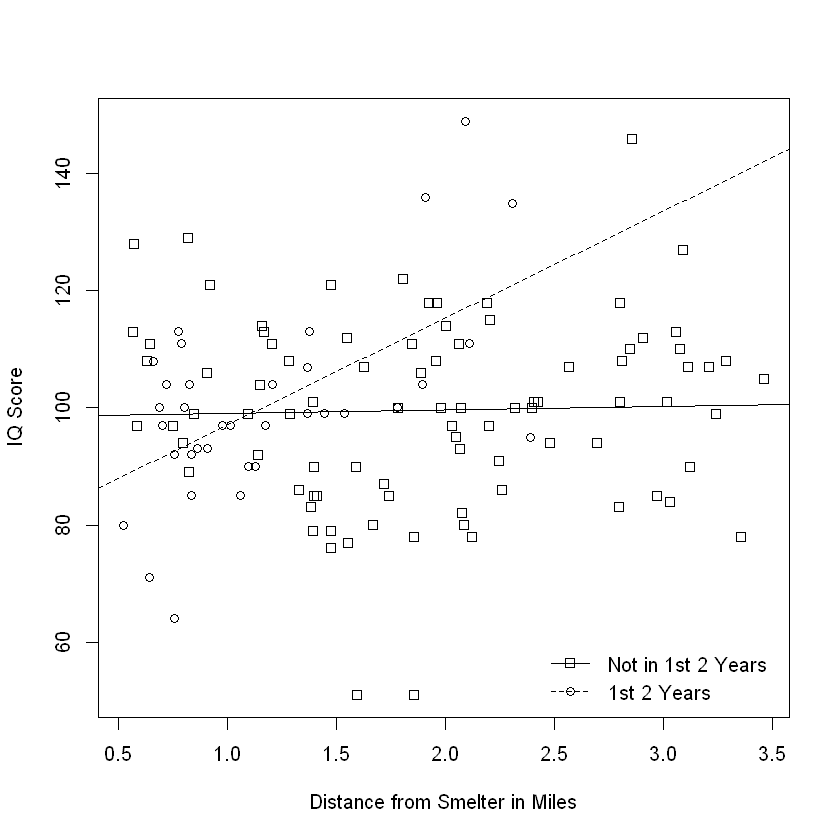

In [5]:
plot(x=lead$miles, y=lead$iq, pch=lead$first2y, xlab='Distance from Smelter in Miles', ylab='IQ Score')
abline(a=98.451, b=0.591, lty=1) # didn't live within first 2 years
abline(a=78.840, b=18.246, lty=2) # did live within first 2 years
legend('bottomright', bty='n', pch=c(0,1), lty=c(1,2), legend=c('Not in 1st 2 Years','1st 2 Years'))

In [6]:
lead$nt_1st2y <- abs(lead$first2y -1)

In [7]:
m_reverse <- lm(iq ~ miles+nt_1st2y+ miles*nt_1st2y, data = lead )
round(cbind(summary(m_reverse)$coefficients, confint(m_reverse)), 4)

,Estimate,Std. Error,t value,Pr(>|t|),2.5 %,97.5 %
(Intercept),78.8397,6.5203,12.0915,0.0000,65.9300,91.7494
miles,18.2460,5.0609,3.6053,0.0005,8.2257,28.2662
nt_1st2y,19.6116,7.8583,2.4957,0.0139,4.0527,35.1705
miles:nt_1st2y,-17.6546,5.4811,-3.2210,0.0016,-28.5068,-6.8024


In [32]:
mod2 <- glm(iq ~ miles + first2y + miles*first2y, data=lead)
summary(mod2)


Call:
glm(formula = iq ~ miles + first2y + miles * first2y, data = lead)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-48.549   -9.405    0.154    9.926   45.861  

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    98.4513     4.3862  22.446  < 2e-16 ***
miles           0.5913     2.1047   0.281  0.77922    
first2y       -19.6116     7.8583  -2.496  0.01393 *  
miles:first2y  17.6546     5.4811   3.221  0.00164 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 236.2981)

    Null deviance: 31462  on 123  degrees of freedom
Residual deviance: 28356  on 120  degrees of freedom
AIC: 1035.5

Number of Fisher Scoring iterations: 2


In [33]:
vcov(mod2)

,(Intercept),miles,first2y,miles:first2y
(Intercept),19.238636,-8.570863,-19.238636,8.570863
miles,-8.570863,4.429659,8.570863,-4.429659
first2y,-19.238636,8.570863,61.752661,-38.835956
miles:first2y,8.570863,-4.429659,-38.835956,30.042297


In [2]:
model1 <- glm(expose ~ iq, data=lead)
summary(model1)
summary(model1)$coefficients


Call:
glm(formula = expose ~ iq, data = lead)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.7199  -0.3769  -0.2732   0.5624   0.7804  

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.084333   0.269727   4.020 0.000101 ***
iq          -0.007146   0.002668  -2.678 0.008421 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 0.2240058)

    Null deviance: 28.935  on 123  degrees of freedom
Residual deviance: 27.329  on 122  degrees of freedom
AIC: 170.37

Number of Fisher Scoring iterations: 2


,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),1.084333427,0.269727112,4.020113,0.0001011308
iq,-0.007146336,0.002668307,-2.678228,0.0084214222


iq is linearly associated with lead exposure with p value 

# 1b

In [3]:
gender = glm(iq ~ expose + sex, data = lead )
summary(gender)


Call:
glm(formula = iq ~ expose + sex, data = lead)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-52.664   -9.935    0.921    9.839   45.336  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  106.002      4.439  23.878   <2e-16 ***
expose        -7.916      2.911  -2.719   0.0075 ** 
sex           -2.338      2.887  -0.810   0.4196    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 244.2547)

    Null deviance: 31462  on 123  degrees of freedom
Residual deviance: 29555  on 121  degrees of freedom
AIC: 1038.6

Number of Fisher Scoring iterations: 2


In [7]:
crude = model1$coefficients[2]
crude
b_adj = gender$coefficients[2]
b_adj
CR = (crude - b_adj)/crude
CR


iq 
-0.007146336

expose 
-7.916312

iq 
-1106.744

here, CR < 0.2
linearly associated with leadexposure with p valuewhen adjusting with sex, not a cofounder with an operational criterion < 20%

# 1c

not a confounder with  an operational criterion < 20%, report A

# mediation

In [15]:
crude2 = model1
B_crude = crude2$coefficients[2]
B_crude

iq 
-0.007146336

In [12]:
model2 <- glm( expose ~ iq + resdur, data=lead )
badjacent = model2$coefficients[2]
badjacent
bm = model2$coefficients[3]
bm

iq 
-0.007249275

resdur 
-0.00266848

In [14]:
model3 = glm(iq ~resdur, data = lead)
gamma_x = model3$coefficients[2]
gamma_x

resdur 
-0.8246537

In [21]:
cov2 = summary(model3)$coefficients

# 2b

In [17]:
percent_mediation = ((B_crude - badjacent)/B_crude) *100
percent_mediation

iq 
-1.440443

# 2c

In [18]:
adj2 = summary(model2)$coefficients

In [22]:
bm = adj2[3,2]
gammax = cov2[2,2]

In [23]:
percent = sqrt((gamma_x^2)*(bm^2)+ (bm^2)*(gammax^2))

In [24]:
u1 = (B_crude - badjacent) + (1.96)^(percent)
l1 = (B_crude - badjacent) - (1.96)^(percent)

In [25]:
upper = u1/B_crude
lower = l1/B_crude

In [30]:
upper

iq 
-141.0432

In [27]:
z_value = (B_crude - badjacent)/ percent

In [29]:
pvalue = 2 * pnorm(z_value)
pvalue

iq 
1.007078

In [ ]:
SE <- sqrt( (g_X2)^2*(df_adj2['resdur', 'Std. Error'])^2 + (B_M)^2*(df_cov2['expose', 'Std. Error'])^2 )
Z <- indirect_effect/SE
p <- 2*pnorm(Z)
p
CI_upper <- indirect_effect + 1.96*SE
CI_lower <- indirect_effect - 1.96*SE
prop_upper <- CI_upper/B_crude2
prop_lower <- CI_lower/B_crude2
print(c(prop_lower, prop_upper))

In [10]:
model_crud <- glm( expose ~ resdur , data=lead )
summary(model_crud)$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),0.348654217,0.09608630,3.6285528,0.0004174249
resdur,0.003309662,0.01269108,0.2607864,0.7946968977


# E1

In [2]:
SNPs <- c(0.040,0.100,0.400,0.550,0.340,0.620,0.001,0.010,0.800,0.005)

In [3]:
round(cbind('FDR' = p.adjust(SNPs, method = "fdr"),
           'BON' = p.adjust(SNPs, method = "bonferroni")),4)

FDR,BON
0.1000,0.40
0.2000,1.00
0.5714,1.00
0.6875,1.00
0.5667,1.00
0.6889,1.00
0.0100,0.01
0.0333,0.10
0.8000,1.00
0.0250,0.05


# E2

In [4]:
# Create data set from table
lung <- data.frame( group=c( rep('A',5), rep('B',12), rep('C',5) ),
react=c(20.8,4.1,30,24.7,13.8,
7.5,7.5,11.9,4.5,3.1,8,4.7,28.1,10.3,10,5.1,2.2,
9.2,2,2.5,6.1,7.5) )

In [5]:
oneway.test(react ~ group, data=lung, var.equal = T)


	One-way analysis of means

data:  react and group
F = 4.9893, num df = 2, denom df = 19, p-value = 0.01813


In [10]:
library(DescTools)
anova <- aov(react ~ group, data=lung)
PostHocTest(anova, method = c('lsd'))


  Posthoc multiple comparisons of means : Fisher LSD 
    95% family-wise confidence level

$group
       diff    lwr.ci    upr.ci   pval    
B-A -10.105 -18.01927 -2.190731 0.0151 *  
C-A -13.220 -22.62355 -3.816447 0.0084 ** 
C-B  -3.115 -11.02927  4.799269 0.4203    

---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


# 2b

In [11]:
PostHocTest(anova, method = c('hsd'))


  Posthoc multiple comparisons of means : Tukey HSD 
    95% family-wise confidence level

$group
       diff    lwr.ci     upr.ci   pval    
B-A -10.105 -19.71110 -0.4988964 0.0382 *  
C-A -13.220 -24.63375 -1.8062481 0.0217 *  
C-B  -3.115 -12.72110  6.4911036 0.6932    

---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


In [12]:
oneway.test(react ~ group, data=lung, var.equal = F)


	One-way analysis of means (not assuming equal variances)

data:  react and group
F = 3.9682, num df = 2.0000, denom df = 8.9319, p-value = 0.05845


# 3

In [2]:
carotenoids <-  read.table('D:/3rd_Semester/6611_biostatisticalmethod/hw9/carotenoids.dat')

In [3]:
colnames(carotenoids) <- c('age','sex','smoke','bmi','vitamins','calories','fat',
'fiber','alcohol','chol','betadiet','retdiet','betaplas','retplas')

In [4]:
install.packages('plotrix')
library(plotrix)

package 'plotrix' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Swayanshu\AppData\Local\Temp\Rtmp2L2i4e\downloaded_packages


Warning message:
"package 'plotrix' was built under R version 3.6.3"

In [29]:
subset <- data.frame(carotenoids$betaplas, carotenoids$calories, carotenoids$smoke)
smoke1 <- mean(subset$carotenoids.betaplas [subset$carotenoids.smoke==1])
sprintf("%s is the mean for betaplas when smoke = 1", smoke1)
smoke2 <- mean(subset$carotenoids.betaplas [subset$carotenoids.smoke==2])
sprintf("%s is the mean for betaplas when smoke = 2", smoke2)
smoke3 <- mean(subset$carotenoids.betaplas [subset$carotenoids.smoke==3])
sprintf("%s is the mean for betaplas when smoke = 3", smoke3)
sd1 <- sd(subset$carotenoids.betaplas [subset$carotenoids.smoke==1])
sprintf("%s is the standard deviation for betaplas when smoke = 3", sd1)
sd2 <- sd(subset$carotenoids.betaplas [subset$carotenoids.smoke==2])
sprintf("%s is the standard deviation for betaplas when smoke = 3", sd2)
sd3 <- sd(subset$carotenoids.betaplas [subset$carotenoids.smoke==3])
sprintf("%s is the standard deviation for betaplas when smoke = 3", sd3)
std.error(subset$carotenoids.betaplas [subset$carotenoids.smoke==1])
std.error(subset$carotenoids.betaplas [subset$carotenoids.smoke==2])
std.error(subset$carotenoids.betaplas [subset$carotenoids.smoke==3])


[1] "206.050955414013 is the mean for betaplas when smoke = 1"

[1] "193.469565217391 is the mean for betaplas when smoke = 2"

[1] "121.325581395349 is the mean for betaplas when smoke = 3"

[1] "193.208562618102 is the standard deviation for betaplas when smoke = 3"

[1] "191.639524626138 is the standard deviation for betaplas when smoke = 3"

[1] "78.8116262060946 is the standard deviation for betaplas when smoke = 3"

[1] 15.41972

[1] 17.87048

[1] 12.01866

In [11]:
linreg_anova_func <- function(mod, ndigits=2, p_ndigits=3, format='kable'){
  if( class(mod)[1] == 'glm' ){
    y <- mod$y
  }
  if( class(mod)[1] == 'lm' ){
    y <- mod$model[,1] # first column contains outcome data
  }  
  
  ybar <- mean(y)
  yhat <- predict(mod)
  p <- length(mod$coefficients)-1
  n <- length(y)

  ssm <- sum( (yhat-ybar)^2 )
  sse <- sum( (y-yhat)^2 )
  sst <- sum( (y-ybar)^2 )
  
  msm <- ssm/p
  mse <- sse/(n-p-1)
  
  f_val <- msm/mse
  p_val <- pf(f_val, df1=p, df2=n-p-1, lower.tail=FALSE)
  
  # Create an ANOVA table to summarize all our results:
  p_digits <- (10^(-p_ndigits))
  p_val_tab <- if(p_val<p_digits){paste0('<',p_digits)}else{round(p_val,p_ndigits)}
  
  anova_table <- data.frame( 'Source' = c('Model','Error','Total'),
                          'Sums of Squares' = c(round(ssm,ndigits), round(sse,ndigits), round(sst,ndigits)),
                          'Degrees of Freedom' = c(p, n-p-1, n-1),
                          'Mean Square' = c(round(msm,ndigits), round(mse,ndigits),''),
                          'F Value' = c(round(f_val,ndigits),'',''),
                          'p-value' = c(p_val_tab,'',''))

  if( format == 'kable' ){  
    library(kableExtra)
    kbl(anova_table, col.names=c('Source','Sums of Squares','Degrees of Freedom','Mean Square','F-value','p-value'), align='lccccc', escape=F) %>%
      kable_styling(bootstrap_options = "striped", full_width = F, position = "left")
  }else{
    anova_table
  }
}

In [14]:
install.packages('doBy')
library(doBy)

also installing the dependency 'Deriv'



package 'Deriv' successfully unpacked and MD5 sums checked
package 'doBy' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Swayanshu\AppData\Local\Temp\Rtmp2L2i4e\downloaded_packages


Warning message:
"package 'doBy' was built under R version 3.6.3"

In [16]:
install.packages('kableExtra')
library(kableExtra)

also installing the dependency 'webshot'



package 'webshot' successfully unpacked and MD5 sums checked
package 'kableExtra' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Swayanshu\AppData\Local\Temp\Rtmp2L2i4e\downloaded_packages


Warning message:
"package 'kableExtra' was built under R version 3.6.3"

In [17]:
carotenoids$smoke_factor <- factor(carotenoids$smoke, levels=c(1,2,3),
                            labels=c('Never','Former','Current'))

# Write functions to calculate N and SE
n.sum <- function(x) sum(!is.na(x))
se_calc <- function(x) sd(x) / sqrt(sum(!is.na(x)))

library(doBy)
library(kableExtra)

sum_tab <- summaryBy(betaplas ~ smoke_factor, data=carotenoids, 
                     FUN=list(n.sum, mean, sd, se_calc))
sum_tab # print the object to see the "raw" output

smoke_factor,betaplas.n.sum,betaplas.mean,betaplas.sd,betaplas.se_calc
Never,157,206.0510,193.20856,15.41972
Former,115,193.4696,191.63952,17.87048
Current,43,121.3256,78.81163,12.01866


In [18]:
kbl(sum_tab, col.names=c('Smoking Group','N','Mean','SD','SE'), align='lcccc', escape=F) %>%
  kable_styling(bootstrap_options = "striped", full_width = F, position = "left")# print a formatted table

<table class="table table-striped" style="width: auto !important; ">
 <thead>
  <tr>
   <th style="text-align:left;"> Smoking Group </th>
   <th style="text-align:center;"> N </th>
   <th style="text-align:center;"> Mean </th>
   <th style="text-align:center;"> SD </th>
   <th style="text-align:center;"> SE </th>
  </tr>
 </thead>
<tbody>
  <tr>
   <td style="text-align:left;"> Never </td>
   <td style="text-align:center;"> 157 </td>
   <td style="text-align:center;"> 206.0510 </td>
   <td style="text-align:center;"> 193.20856 </td>
   <td style="text-align:center;"> 15.41972 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> Former </td>
   <td style="text-align:center;"> 115 </td>
   <td style="text-align:center;"> 193.4696 </td>
   <td style="text-align:center;"> 191.63952 </td>
   <td style="text-align:center;"> 17.87048 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> Current </td>
   <td style="text-align:center;"> 43 </td>
   <td style="text-align:center;"> 121.3256 </td

In [19]:
# Using factor created smoke variable:
model <- lm(betaplas ~ smoke_factor + calories, data=carotenoids)
coef(model)


(Intercept)  smoke_factorFormer smoke_factorCurrent            calories 
      209.595793363       -12.275610420       -84.281151966        -0.002068907

In [30]:
carotenoids$X1 <- carotenoids$smoke==2
carotenoids$X2 <- carotenoids$smoke==3
model_alt <- lm(betaplas ~ X1 + X2 + calories, data=carotenoids)
coef(model_alt)

(Intercept)        X1TRUE        X2TRUE      calories 
209.595793363 -12.275610420 -84.281151966  -0.002068907

In [22]:
summary(model)


Call:
lm(formula = betaplas ~ smoke_factor + calories, data = carotenoids)

Residuals:
    Min      1Q  Median      3Q     Max 
-203.36  -98.52  -45.00   43.66 1209.62 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)         209.595793  29.801831   7.033 1.29e-11 ***
smoke_factorFormer  -12.275610  22.417618  -0.548  0.58437    
smoke_factorCurrent -84.281152  31.448087  -2.680  0.00775 ** 
calories             -0.002069   0.015195  -0.136  0.89178    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 181.7 on 311 degrees of freedom
Multiple R-squared:  0.02332,	Adjusted R-squared:  0.0139 
F-statistic: 2.475 on 3 and 311 DF,  p-value: 0.06153


In [31]:
null_model <- lm(betaplas ~ 1, data=carotenoids)
anova(model, null_model, test='F')

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
311,10270401,NA,NA,NA,NA
314,10515638,-3,-245236.9,2.475355,0.06152536


In [32]:
model2 <- lm(betaplas ~ calories, data=carotenoids)
#anova function for partial F-test
anova(model, model2, test='F')

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
311,10270401,NA,NA,NA,NA
313,10510453,-2,-240051.1,3.634517,0.02752413


In [33]:
model3 <- lm(betaplas ~ smoke_factor, data=carotenoids)

In [34]:
summary(model3)


Call:
lm(formula = betaplas ~ smoke_factor, data = carotenoids)

Residuals:
    Min      1Q  Median      3Q     Max 
-206.05  -98.05  -45.47   43.60 1208.95 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)           206.05      14.48  14.230  < 2e-16 ***
smoke_factorFormer    -12.58      22.27  -0.565  0.57251    
smoke_factorCurrent   -84.73      31.23  -2.713  0.00704 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 181.4 on 312 degrees of freedom
Multiple R-squared:  0.02326,	Adjusted R-squared:  0.017 
F-statistic: 3.715 on 2 and 312 DF,  p-value: 0.02543


In [35]:
anova(model3, null_model, test='F')

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
312,10271014,NA,NA,NA,NA
314,10515638,-2,-244624.7,3.715451,0.02542822


In [1]:
amniotic <- data.frame(
cells = c(1.13,1.20,1.00,0.91,1.05,1.75,1.45,1.55,1.64,1.60,
2.30,2.15,2.25,2.40,2.49,3.18,3.10,3.28,3.35,3.12),
temp = c(rep(40,5), rep(60,5), rep(80,5), rep(100,5)))
amniotic$ln_cells <- log(amniotic$cells) # calculate log(cells)

In [2]:
model <- glm( log(cells) ~ temp, data=amniotic)

In [3]:
summary(model)


Call:
glm(formula = log(cells) ~ temp, data = amniotic)

Deviance Residuals: 
      Min         1Q     Median         3Q        Max  
-0.168328  -0.049781  -0.002362   0.048546   0.114505  

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.6681674  0.0527461  -12.67  2.1e-10 ***
temp         0.0185546  0.0007178   25.85  1.1e-15 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 0.005152141)

    Null deviance: 3.535481  on 19  degrees of freedom
Residual deviance: 0.092739  on 18  degrees of freedom
AIC: -44.717

Number of Fisher Scoring iterations: 2


#  Log Transformation

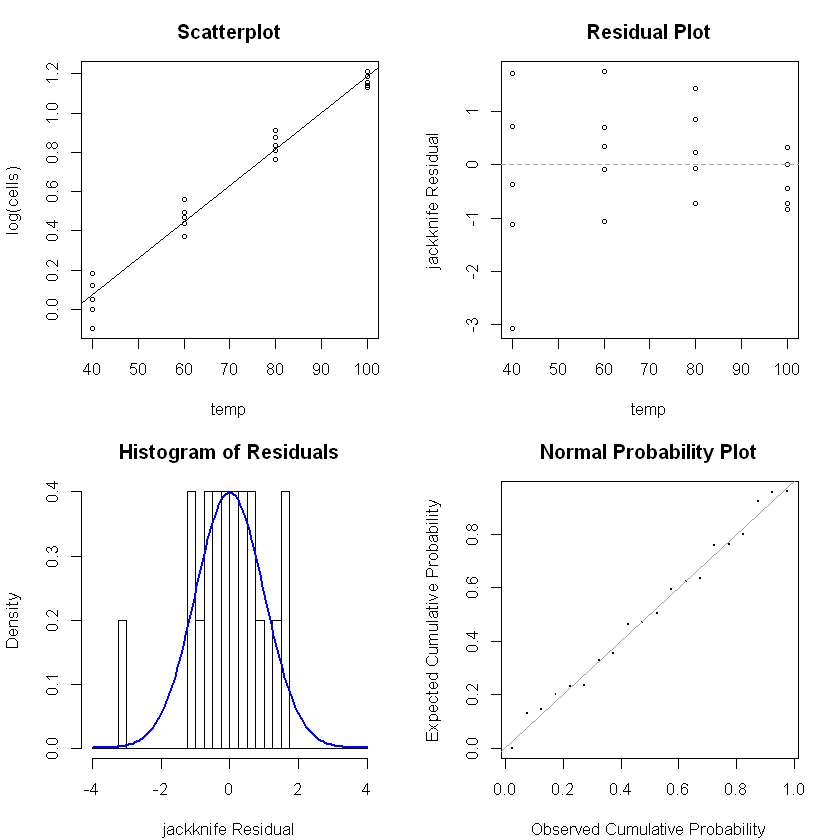

In [6]:
par(mfrow=c(2,2), mar=c(4.1,4.1,3.1,2.1))
plot(x=amniotic$temp, y=log(amniotic$cells), xlab='temp', ylab='log(cells)',
main='Scatterplot', cex=0.7); abline( model )

plot(x=amniotic$temp, y=rstudent(model), xlab='temp', ylab='jackknife Residual',
main='Residual Plot', cex=0.7); abline(h=0, lty=2, col='gray65')

hist(rstudent(model), xlab='jackknife Residual',
main='Histogram of Residuals', freq=F, breaks=seq(-4,4,0.25));


curve( dnorm(x,mean=0,sd=1), lwd=2, col='blue', add=T)
plot( ppoints(length(rstudent(model))), sort(pnorm(rstudent(model))),
xlab='Observed Cumulative Probability',
ylab='Expected Cumulative Probability',
main='Normal Probability Plot', cex=2, pch='.');
abline(a=0,b=1, col='gray65', lwd=1)

In [7]:
coef(model)

(Intercept)        temp 
-0.66816743  0.01855463

In [12]:
confint(model,'temp',level=0.95)

Waiting for profiling to be done...


2.5 %     97.5 % 
0.01714780 0.01996146

In [8]:
summary(model)$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-0.66816743,0.0527461488,-12.66761,2.100675e-10
temp,0.01855463,0.0007177842,25.84987,1.103493e-15


In [3]:
model_withoutlog <- glm( cells ~ temp, data=amniotic)

In [8]:
summary(model_withoutlog)


Call:
glm(formula = cells ~ temp, data = amniotic)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.2532  -0.0909  -0.0014   0.0814   0.2304  

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.462400   0.104811  -4.412 0.000337 ***
temp         0.035820   0.001426  25.114 1.83e-15 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 0.02034311)

    Null deviance: 13.19690  on 19  degrees of freedom
Residual deviance:  0.36618  on 18  degrees of freedom
AIC: -17.25

Number of Fisher Scoring iterations: 2


In [4]:
summary(model_withoutlog)$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-0.46240,0.104810686,-4.411764,3.365925e-04
temp,0.03582,0.001426293,25.114058,1.831172e-15


In [10]:
confint(model_withoutlog)

Waiting for profiling to be done...


,2.5 %,97.5 %
(Intercept),-0.66782517,-0.25697483
temp,0.03302452,0.03861548


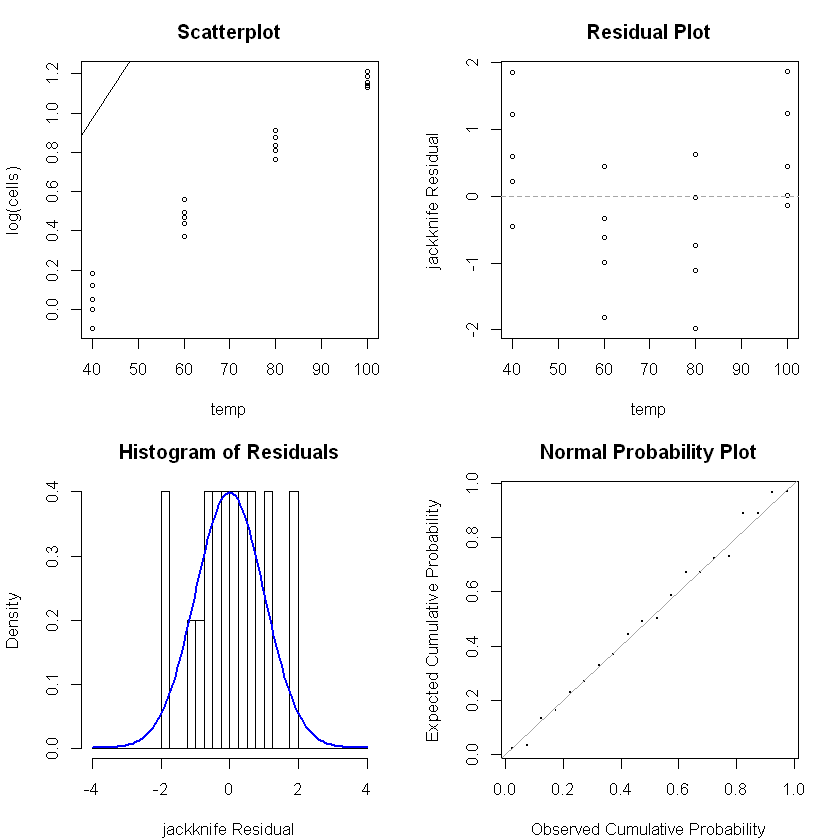

In [7]:
par(mfrow=c(2,2), mar=c(4.1,4.1,3.1,2.1))
plot(x=amniotic$temp, y=log(amniotic$cells), xlab='temp', ylab='log(cells)',
main='Scatterplot', cex=0.7); abline( model_withoutlog )

plot(x=amniotic$temp, y=rstudent(model_withoutlog), xlab='temp', ylab='jackknife Residual',
main='Residual Plot', cex=0.7); abline(h=0, lty=2, col='gray65')

hist(rstudent(model_withoutlog), xlab='jackknife Residual',
main='Histogram of Residuals', freq=F, breaks=seq(-4,4,0.25));


curve( dnorm(x,mean=0,sd=1), lwd=2, col='blue', add=T)
plot( ppoints(length(rstudent(model_withoutlog))), sort(pnorm(rstudent(model_withoutlog))),
xlab='Observed Cumulative Probability',
ylab='Expected Cumulative Probability',
main='Normal Probability Plot', cex=2, pch='.');
abline(a=0,b=1, col='gray65', lwd=1)

# 3

In [13]:
Heart_study <- read.csv('D:/3rd_Semester/6611_biostatisticalmethod/hw8/frmgham2_baseline_subset.csv')

In [14]:
summary(Heart_study)

     RANDID             SEX           TOTCHOL         AGE       
 Min.   :   2448   Min.   :1.000   Min.   :107   Min.   :32.00  
 1st Qu.:2440336   1st Qu.:1.000   1st Qu.:206   1st Qu.:42.00  
 Median :4972848   Median :2.000   Median :234   Median :49.00  
 Mean   :4987278   Mean   :1.562   Mean   :237   Mean   :49.93  
 3rd Qu.:7463577   3rd Qu.:2.000   3rd Qu.:264   3rd Qu.:57.00  
 Max.   :9999312   Max.   :2.000   Max.   :696   Max.   :70.00  
                                   NA's   :52                   
     SYSBP           DIABP           CURSMOKE         CIGPDAY      
 Min.   : 83.5   Min.   : 48.00   Min.   :0.0000   Min.   : 0.000  
 1st Qu.:117.5   1st Qu.: 75.00   1st Qu.:0.0000   1st Qu.: 0.000  
 Median :129.0   Median : 82.00   Median :0.0000   Median : 0.000  
 Mean   :132.9   Mean   : 83.08   Mean   :0.4919   Mean   : 8.966  
 3rd Qu.:144.0   3rd Qu.: 90.00   3rd Qu.:1.0000   3rd Qu.:20.000  
 Max.   :295.0   Max.   :142.50   Max.   :1.0000   Max.   :70.000  
    

In [16]:
model3 <- lm(TOTCHOL ~ CURSMOKE + BMI + PREVMI +PREVCHD + PREVSTRK+ PREVHYP, data = Heart_study)
summary(model3)


Call:
lm(formula = TOTCHOL ~ CURSMOKE + BMI + PREVMI + PREVCHD + PREVSTRK + 
    PREVHYP, data = Heart_study)

Residuals:
    Min      1Q  Median      3Q     Max 
-128.41  -30.03   -3.41   26.37  452.40 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 211.9363     4.5331  46.753  < 2e-16 ***
CURSMOKE     -2.1263     1.3536  -1.571    0.116    
BMI           0.8466     0.1721   4.920 8.97e-07 ***
PREVMI        1.3375     6.3899   0.209    0.834    
PREVCHD       1.6353     4.3548   0.376    0.707    
PREVSTRK     -7.0327     8.1004  -0.868    0.385    
PREVHYP      13.1050     1.5071   8.696  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 43.93 on 4357 degrees of freedom
  (70 observations deleted due to missingness)
Multiple R-squared:  0.03336,	Adjusted R-squared:  0.03203 
F-statistic: 25.06 on 6 and 4357 DF,  p-value: < 2.2e-16


In [17]:
library(tidyverse)

Warning message:
"package 'tidyverse' was built under R version 3.6.3"-- Attaching packages --------------------------------------- tidyverse 1.3.0 --
v ggplot2 3.3.2     v purrr   0.3.4
v tibble  3.0.3     v dplyr   1.0.2
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'tibble' was built under R version 3.6.3"Warning message:
"package 'tidyr' was built under R version 3.6.3"Warning message:
"package 'purrr' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


In [19]:
filtered_data <- Heart_study %>%
        select('TOTCHOL', 'CURSMOKE', 'BMI', 'PREVMI', 'PREVCHD', 'PREVSTRK', 'PREVHYP') %>%
        filter(complete.cases(.))

In [20]:
dim(filtered_data)

[1] 4364    7

In [21]:
dim(Heart_study)

[1] 4434   39

Here Dimesion has filtered by 70 rows as mentioned

In [23]:
model_c <- glm(TOTCHOL ~ BMI + CURSMOKE, data = filtered_data)
summary(model_c)


Call:
glm(formula = TOTCHOL ~ BMI + CURSMOKE, data = filtered_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-128.35   -30.59    -3.66    27.02   462.19  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 205.4060     4.5068  45.577  < 2e-16 ***
BMI           1.2780     0.1662   7.691 1.79e-14 ***
CURSMOKE     -2.8298     1.3617  -2.078   0.0378 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 1963.086)

    Null deviance: 8700437  on 4363  degrees of freedom
Residual deviance: 8561019  on 4361  degrees of freedom
AIC: 45479

Number of Fisher Scoring iterations: 2


In [24]:
all_d <- glm(TOTCHOL ~ ., data = filtered_data)

In [25]:
anova (all_d, model_c, test = "F")

Resid. Df,Resid. Dev,Df,Deviance,F,Pr(>F)
4357,8410206,NA,NA,NA,NA
4361,8561019,-4,-150813.6,19.53266,6.021663e-16


In [27]:
smoke_m <- glm(TOTCHOL ~  BMI + PREVMI +PREVCHD + PREVSTRK+ PREVHYP, data = filtered_data)
anova(all_d, smoke_m, test = "F")

Resid. Df,Resid. Dev,Df,Deviance,F,Pr(>F)
4357,8410206,NA,NA,NA,NA
4358,8414969,-1,-4763.093,2.467573,0.1162899


In [28]:
round(summary(all_d)$coefficients, 6)

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),211.936264,4.533141,46.752632,0.000000
CURSMOKE,-2.126312,1.353605,-1.570851,0.116290
BMI,0.846552,0.172061,4.920081,0.000001
PREVMI,1.337489,6.389908,0.209313,0.834214
PREVCHD,1.635278,4.354847,0.375508,0.707301
PREVSTRK,-7.032683,8.100367,-0.868193,0.385336
PREVHYP,13.104980,1.507081,8.695604,0.000000


In [29]:
library(car)

Warning message:
"package 'car' was built under R version 3.6.3"Loading required package: carData
Warning message:
"package 'carData' was built under R version 3.6.3"
Attaching package: 'car'

The following object is masked from 'package:dplyr':

    recode

The following object is masked from 'package:purrr':

    some



In [30]:
vif(all_d)

CURSMOKE      BMI   PREVMI  PREVCHD PREVSTRK  PREVHYP 
1.035263 1.123308 1.783301 1.803381 1.012782 1.121380

In [31]:
summary(all_d)


Call:
glm(formula = TOTCHOL ~ ., data = filtered_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-128.41   -30.03    -3.41    26.37   452.40  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 211.9363     4.5331  46.753  < 2e-16 ***
CURSMOKE     -2.1263     1.3536  -1.571    0.116    
BMI           0.8466     0.1721   4.920 8.97e-07 ***
PREVMI        1.3375     6.3899   0.209    0.834    
PREVCHD       1.6353     4.3548   0.376    0.707    
PREVSTRK     -7.0327     8.1004  -0.868    0.385    
PREVHYP      13.1050     1.5071   8.696  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 1930.274)

    Null deviance: 8700437  on 4363  degrees of freedom
Residual deviance: 8410206  on 4357  degrees of freedom
AIC: 45409

Number of Fisher Scoring iterations: 2


In [33]:
head(all_d)

$coefficients
(Intercept)    CURSMOKE         BMI      PREVMI     PREVCHD    PREVSTRK 
211.9362641  -2.1263116   0.8465525   1.3374890   1.6352783  -7.0326831 
    PREVHYP 
 13.1049799 

$residuals
            1             2             3             4             5 
-3.976778e+01  1.374228e+01  1.373841e+01 -2.210940e+01  5.563469e+01 
            6             7             8             9            10 
-2.269178e+01 -3.496562e+01  8.483679e+01  1.264363e+01 -1.790204e+01 
           11            12            13            14            15 
 2.266922e+01  1.166503e+01  4.881227e+01  8.045320e+01 -2.730400e+00 
           16            17            18            19            20 
-1.998883e+01 -9.852311e+00  6.139765e+01 -3.448383e+01 -3.969159e+01 
           21            22            23            24            25 
-3.808702e+01 -5.223972e+01 -6.862962e+00 -1.606688e+01  2.849478e+01 
           26            27            28            29            30 
 6.372041e+01  2.555391e+01 -2.000149e+01  1.919184e+01  9.362403e+00 
           31            32            33            34            35 
 6.135960e+01 -7.149404e+00 -7.904601e+00 -3.362414e+01 -5.054736e+01 
           36            37            38            39            40 
-4.972512e-01 -2.983324e+01 -3.265891e+01  2.128408e+01 -8.099646e+01 
           41            42            43            44            45 
-1.440570e+01 -5.545349e+01  1.044318e+01  7.482306e+00 -3.912440e+01 
           46            47            48            49            50 
 6.774941e+01 -2.144297e+01  1.164302e+00  3.121987e+01 -4.956109e+01 
           51            52            53            54            55 
-4.951155e+01  2.114350e+01 -1.580485e+01  1.054683e+01  4.131698e+00 
           56            57            58            59            60 
-1.989125e+01  2.296270e+01  4.128226e+01  1.037100e+01 -4.580592e+01 
           61            62            63            64            65 
-2.635471e+01  4.022834e+01  8.429859e+00 -6.436243e+00  4.127822e+00 
           66            67            68            69            70 
-1.465773e+01  2.747355e+00 -3.813306e+01 -6.289125e+00  7.314895e+01 
           71            72            73            74            75 
 7.016129e+01  1.121742e+01 -5.902982e+01 -4.011800e+01 -6.252841e+01 
           76            77            78            79            80 
-7.569555e+00  3.710368e+00 -3.028739e+01 -1.472300e+01 -8.081335e+01 
           81            82            83            84            85 
 2.519749e+01 -7.536550e+01  3.243734e+01 -2.097523e+01 -6.184571e+01 
           86            87            88            89            90 
-3.988756e+01 -3.205209e+01  2.883960e+01  7.052666e+01  1.801251e+01 
           91            92            93            94            95 
 4.650008e+01  4.054437e+01 -3.724260e+01  2.519555e+01  8.885129e+00 
           96            97            98            99           100 
 6.178968e+01  4.423305e+01  9.004044e+00 -4.376565e+01  6.637890e+00 
          101           102           103           104           105 
 5.087853e+01  4.026113e+01 -1.349649e+01  2.485001e+01  4.068334e+01 
          106           107           108           109           110 
-2.082313e+01  1.944679e+01 -5.649230e+01  3.840999e+01  1.526608e+01 
          111           112           113           114           115 
 4.377101e+01  1.865645e+01 -3.788484e+01  1.716003e+01 -3.312780e+01 
          116           117           118           119           120 
 1.068167e+00  3.632827e+01  4.276570e+00  4.674370e+00  3.060977e+01 
          121           122           123           124           125 
-4.036959e+01 -2.050116e+01 -6.915493e+01  6.951786e+00  1.008969e+01 
          126           127           128           129           130 
 5.126821e+01 -5.620284e+01 -6.273945e+01 -1.385877e+01  1.009570e+01 
          131           132           133           134           135 
 1.163424e+00 -2.105842e+01 -1.993923e+

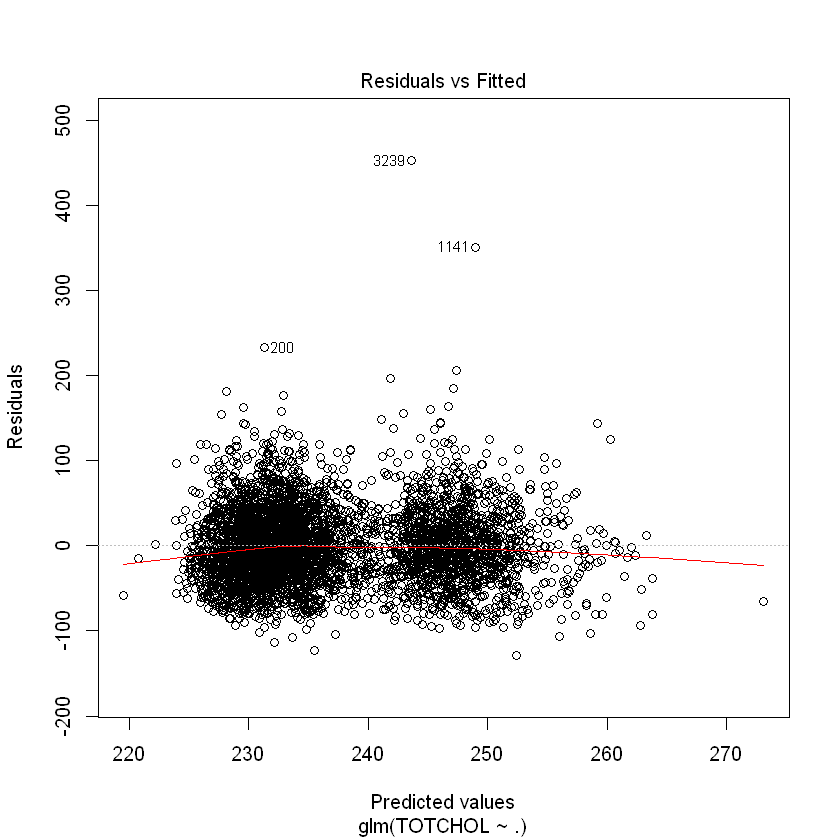

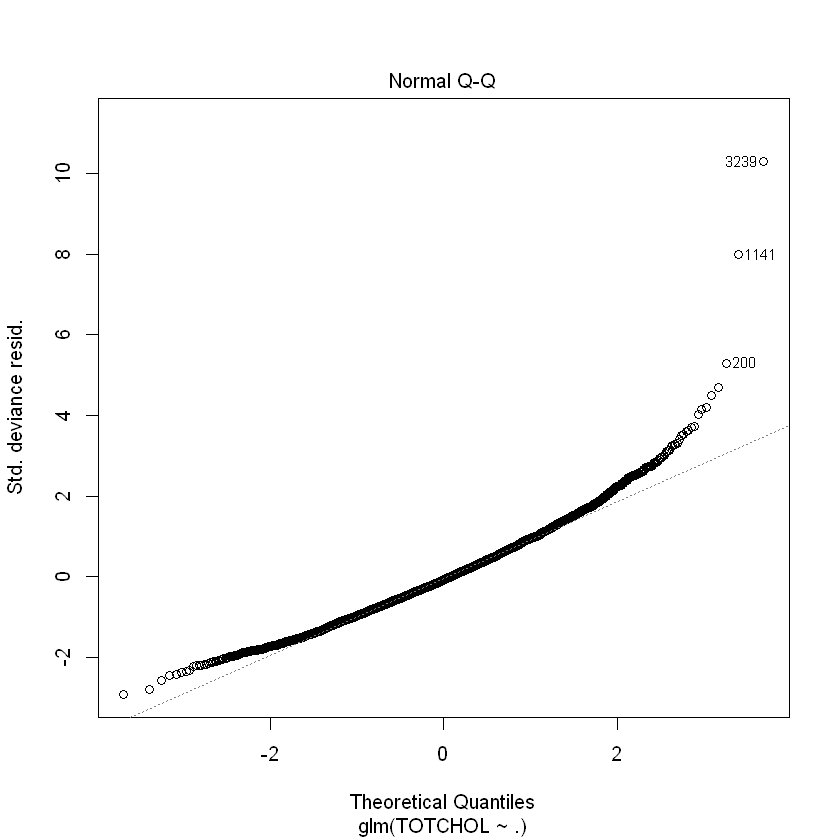

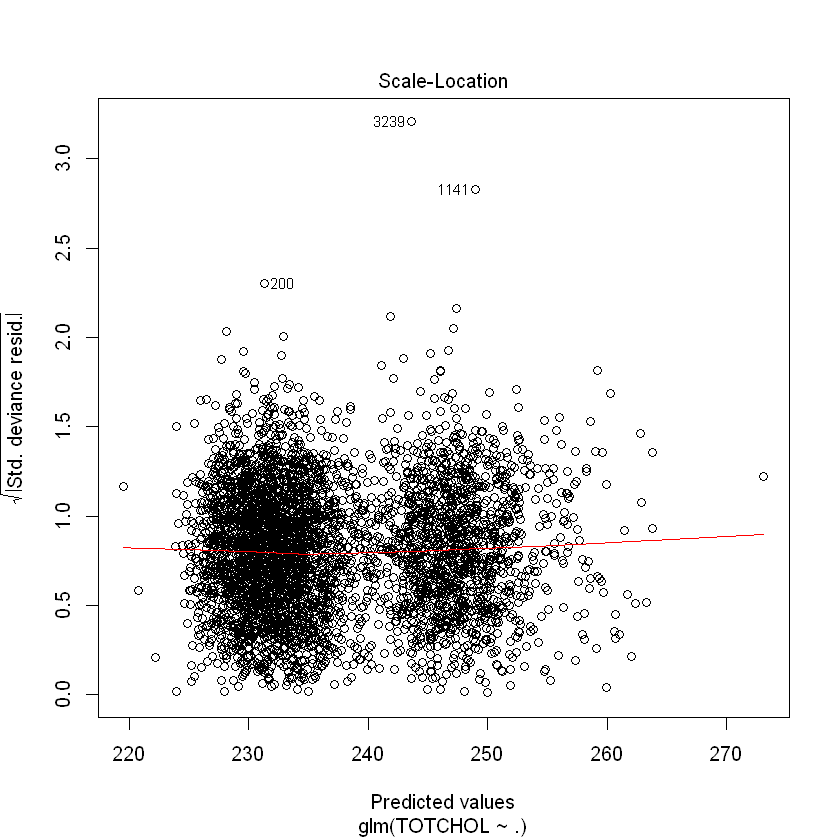

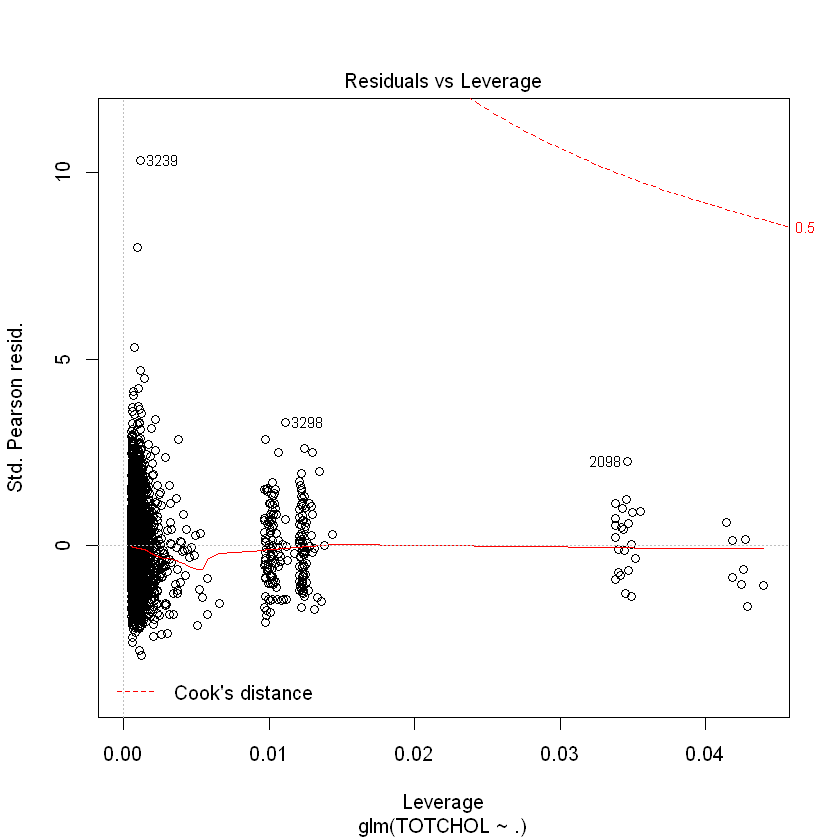

In [37]:
plot(all_d)